In [1]:
from sklearn import tree

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline 

from IPython.display import SVG

from graphviz import Source

from IPython.display import display 

from IPython.display import HTML

style = "<style>svg{width:50% !important;height:30% !important;}</style>"

HTML(style)

In [2]:
titanic_data = pd.read_csv('C:\\Users\\User\\jupyter_pr\\data_frames\\TITANIC\\train.csv'.replace('\\', '/'))

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [5]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [6]:
X = X.fillna({'Age': X.Age.median()})

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [8]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

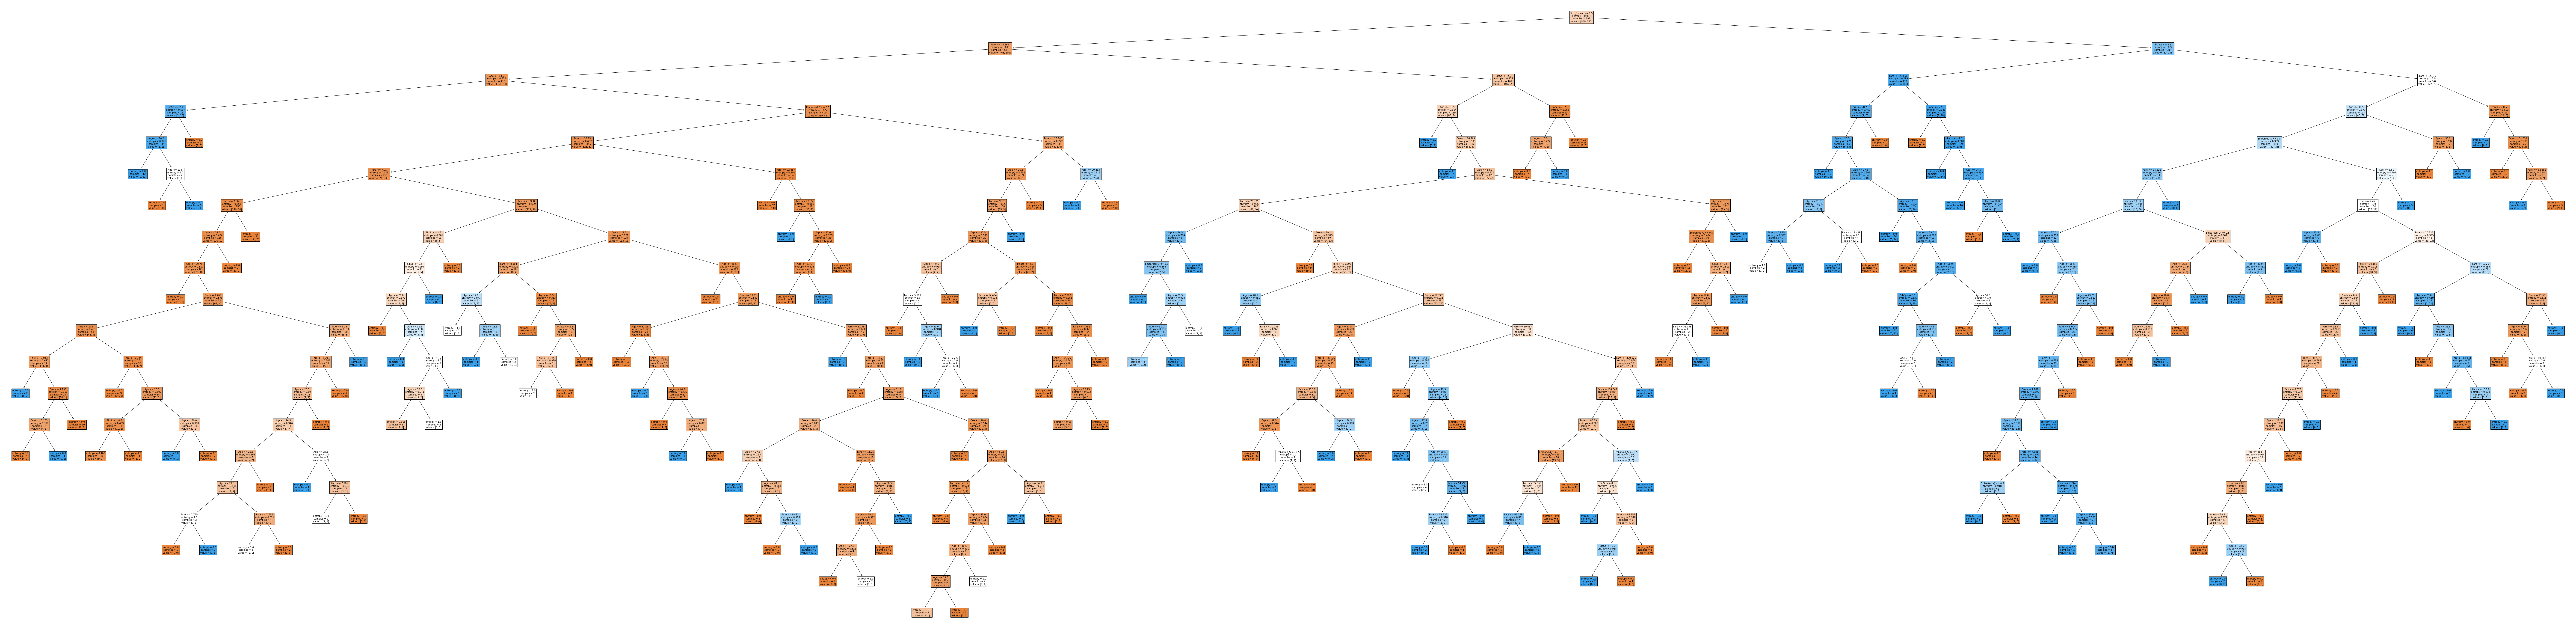

In [9]:
plt.figure(figsize=(200, 50))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True);

In [2]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,0,1,0,0,1
733,2,23.0,0,0,13.0000,0,1,0,0,1
382,3,32.0,0,0,7.9250,0,1,0,0,1
704,3,26.0,1,0,7.8542,0,1,0,0,1
813,3,6.0,4,2,31.2750,1,0,0,0,1


In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [15]:
clf.score(X_train, y_train)

0.848314606741573

In [16]:
clf.score(X_test, y_test)

0.8044692737430168

In [17]:
scores_data = pd.DataFrame()

In [26]:
for max_depth in range(1,100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [27]:
scores_data.head()

,depth,train_score,test_score,cross_val_score
0,1,0.787921,0.782123,0.787876
0,2,0.803371,0.765363,0.786467
0,3,0.834270,0.798883,0.823008
0,4,0.837079,0.798883,0.813169
0,5,0.846910,0.804469,0.811770


In [28]:
scores_data_long = pd.melt(scores_data, id_vars=['depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', value_name='score')

In [29]:
scores_data_long.query('set_type == "cross_val_score"').sort_values('score', ascending=False)

,depth,set_type,score
200,3,cross_val_score,0.823008
201,4,cross_val_score,0.813169
202,5,cross_val_score,0.811770
205,8,cross_val_score,0.804757
204,7,cross_val_score,0.799143
...,...,...,...
291,94,cross_val_score,0.757057
281,84,cross_val_score,0.757008
267,70,cross_val_score,0.755658
245,48,cross_val_score,0.755639


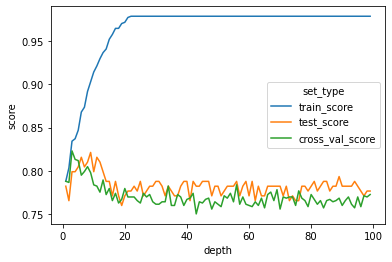

In [30]:
sns.lineplot(data=scores_data_long, x='depth', y='score', hue='set_type');

In [3]:
from sklearn.model_selection import cross_val_score

In [24]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7878755047769133

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

In [32]:
clf = tree.DecisionTreeClassifier()

In [34]:
paramenets = {'criterion':['gini', 'entropy'], 'max_depth':range(1, 30)}

In [37]:
grid_search_cv_clf = GridSearchCV(clf, paramenets, cv=5)

In [39]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [40]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [41]:
best_clf = grid_search_cv_clf.best_estimator_

In [43]:
best_clf.score(X_test, y_test)

0.7988826815642458

In [47]:
y_pred = best_clf.predict(X_test)

In [53]:
precision_score(y_test, y_pred)

0.796875

In [52]:
recall_score(y_test, y_pred)

0.6891891891891891

In [54]:
y_predicted_prob = best_clf.predict_proba(X_test)

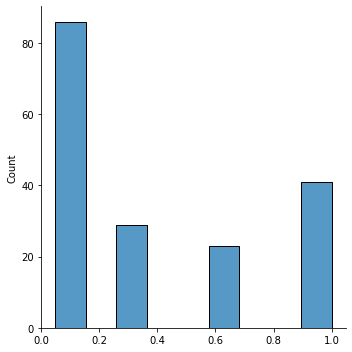

In [61]:
sns.displot(pd.Series(y_predicted_prob[:, 1]))

In [68]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.11864407, 0.96875   , 0.58510638, 0.32967033, 0.04761905,
       0.125     , 1.        ])

In [65]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [66]:
precision_score(y_test, y_pred)

0.9024390243902439

In [67]:
recall_score(y_test, y_pred)

0.5

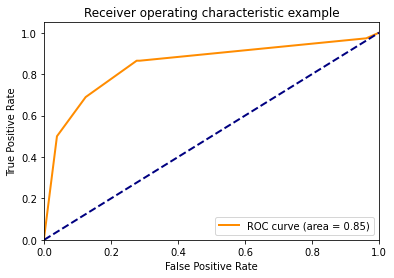

In [70]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [63]:
iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

In [64]:
iris_train.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [65]:
X_iris_train = iris_train.drop(['species'], axis=1)
y_iris_train = iris_train['species']

X_iris_test = iris_test.drop(['species'], axis=1)
y_iris_test = iris_test['species']


In [66]:
rs = np.random.seed(0)

In [79]:
score_data = pd.DataFrame()

In [80]:
for depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=rs)
    clf.fit(X_iris_train, y_iris_train)
    
    score = clf.score(X_iris_train, y_iris_train)
    accuracy_score = clf.score(X_iris_test, y_iris_test)
    
    score_data = score_data.append(pd.DataFrame({'depth':[depth], 'score':[score], 'accuracy_score':[accuracy_score]}))

In [84]:
score_data.sort_values('accuracy_score', ascending=False).head()

,depth,score,accuracy_score
0,99,1.0,0.94
0,46,1.0,0.94
0,81,1.0,0.94
0,31,1.0,0.94
0,32,1.0,0.94


In [75]:
score_data = pd.melt(score_data, id_vars='depth', value_vars=['score', 'accuracy_score'], var_name='sc_type', value_name='sc')

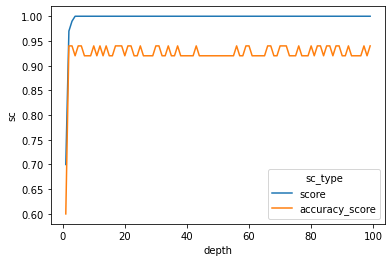

In [76]:
sns.lineplot(x='depth', y='sc', hue='sc_type', data=score_data);

In [124]:
cnd = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [92]:
cnd = cnd.rename(columns={'Длина':'length',
            'Высота':'height',
            'Шерстист':'woolly',
            'Гавкает':'barks',
            'Лазает по деревьям':'climbs',
            'Вид':'species'})

In [125]:
cnd

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [127]:
X, y = cnd.drop(['Вид'], axis=1), cnd['Вид']

In [128]:
scores_data = pd.DataFrame()

In [129]:
for depth in range(1, 10):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(X, y)
    train_score = clf.score(X, y)
    mean_cross_val_score = cross_val_score(clf, X, y, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'depth':[depth],
                                    'train_score':[train_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [130]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [131]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [122]:
df_test = pd.read_json('C:/Users/User/jupyter_pr/data_frames/dataset_209691_15.txt')

In [123]:
df_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,24,28.8,1,1,0
1,17,20.4,1,1,0
2,34,40.8,1,1,0
3,34,40.8,1,1,0
4,31,37.2,1,1,0
...,...,...,...,...,...
95,7,2.8,1,0,1
96,13,5.2,1,0,1
97,8,3.2,1,0,1
98,5,2.0,1,0,1


In [132]:
res = clf.predict(df_test)

In [135]:
pd.Series(res)[res == 'собачка'].count()

56